# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [9]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [10]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [11]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [12]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [14]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링1

### (1) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( Dense( 3 , input_shape = (nfeatures,), activation = 'softmax') )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 2s 179ms/step - loss: 1.3263 - val_loss: 1.1602
Epoch 2/50
3/3 [==============================] - 0s 25ms/step - loss: 1.0875 - val_loss: 1.0138
Epoch 3/50
3/3 [==============================] - 0s 25ms/step - loss: 0.9532 - val_loss: 0.8514
Epoch 4/50
3/3 [==============================] - 0s 30ms/step - loss: 0.8267 - val_loss: 0.7029
Epoch 5/50
3/3 [==============================] - 0s 50ms/step - loss: 0.7171 - val_loss: 0.5881
Epoch 6/50
3/3 [==============================] - 0s 27ms/step - loss: 0.6374 - val_loss: 0.5143
Epoch 7/50
3/3 [==============================] - 0s 45ms/step - loss: 0.5818 - val_loss: 0.4652
Epoch 8/50
3/3 [==============================] - 0s 22ms/step - loss: 0.5365 - val_loss: 0.4317
Epoch 9/50
3/3 [==============================] - 0s 25ms/step - loss: 0.4967 - val_loss: 0.4031
Epoch 10/50
3/3 [==============================] - 0s 22ms/step - loss: 0.4668 - val_loss: 0.3779
Epoch 11/50
3/3 [===========

* 학습결과 그래프

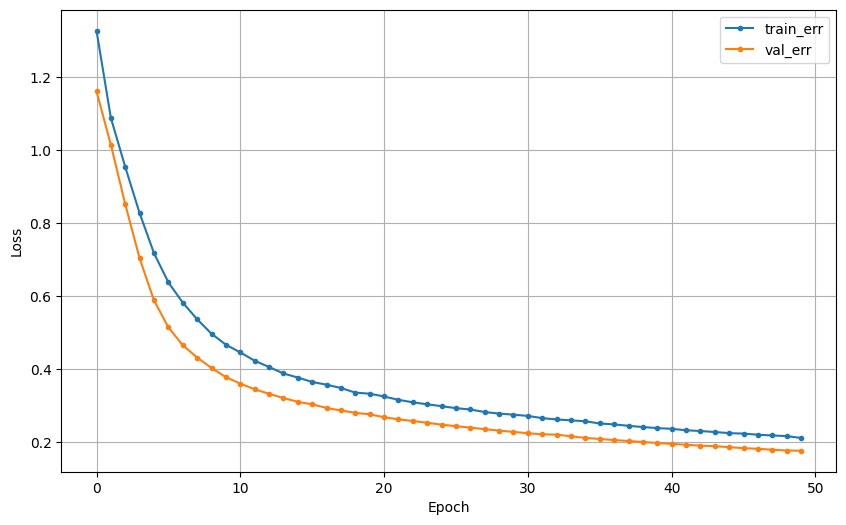

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[9.6960056e-01, 3.0237434e-02, 1.6197725e-04],
       [1.8326221e-02, 7.6600420e-01, 2.1566966e-01],
       [1.9635418e-02, 6.9610417e-01, 2.8426036e-01],
       [8.8648946e-04, 3.1981263e-01, 6.7930079e-01],
       [4.5390062e-02, 8.5838294e-01, 9.6226856e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1) # 행 방향으로 pred에서 가장 큰 값의 인덱스를 추출해서 저장
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       2])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다.

In [ ]:
y_val

47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
147    2
76     1
119    2
35     0
28     0
122    2
13     0
58     1
114    2
57     1
50     1
149    2
111    2
20     0
72     1
81     1
98     1
34     0
104    2
133    2
95     1
88     1
0      0
46     0
11     0
106    2
85     1
1      0
51     1
130    2
55     1
134    2
37     0
65     1
56     1
Name: Species, dtype: int64

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 16  2]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.80      0.89      0.84        18
           2       0.83      0.71      0.77        14

    accuracy                           0.87        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



----

In [ ]:
# 1. y 전처리 : 0, 1, 2 (정수 인코딩)
# 2. Out Layer, activation = 'softmax', node수: 클래스 수
# 3. compile (loss = 'sparse_categorical_crossentropy')
# 4. np.argmax로 큰 값의 인덱스를 뽑

## 4.모델링2 : hidden layer

### (1) 모델1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8 , input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3 , activation = 'softmax') ])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2).history

Epoch 1/50
3/3 [==============================] - 1s 130ms/step - loss: 1.0561 - val_loss: 1.0276
Epoch 2/50
3/3 [==============================] - 0s 24ms/step - loss: 1.0279 - val_loss: 1.0097
Epoch 3/50
3/3 [==============================] - 0s 32ms/step - loss: 1.0057 - val_loss: 0.9886
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 0.9824 - val_loss: 0.9591
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.9535 - val_loss: 0.9249
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.9215 - val_loss: 0.8880
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.8878 - val_loss: 0.8482
Epoch 8/50
3/3 [==============================] - 0s 23ms/step - loss: 0.8534 - val_loss: 0.8076
Epoch 9/50
3/3 [==============================] - 0s 25ms/step - loss: 0.8189 - val_loss: 0.7682
Epoch 10/50
3/3 [==============================] - 0s 21ms/step - loss: 0.7857 - val_loss: 0.7285
Epoch 11/50
3/3 [===========

* 학습결과 그래프

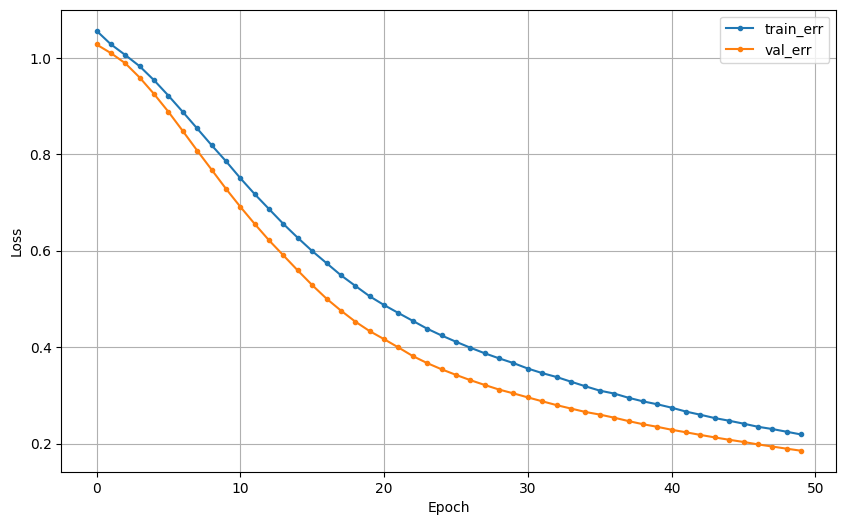

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 17  1]
 [ 0  3 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.94      0.89        18
           2       0.92      0.79      0.85        14

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



### (2) 모델2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
clear_session()

n = x_train.shape[1]
model2 = Sequential([Dense(8, input_shape=(n,), activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(3, activation='softmax')]) # 클래스를 3개로 분류하고 싶으면 마지막 ol은 클래스 수로 지정
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model2.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')
hist = model2.fit(x_train, y_train, epochs=50, validation_split=.2, verbose=0).history

* 학습결과 그래프

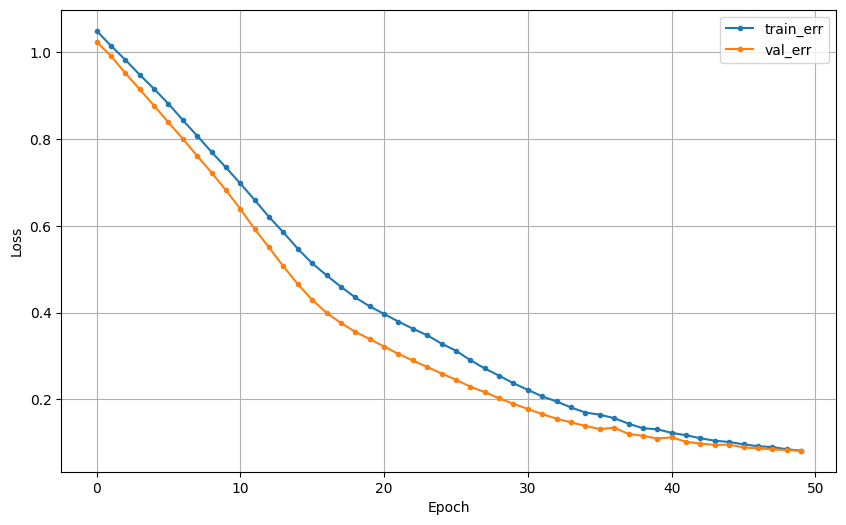

In [ ]:
dl_history_plot(hist)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred2 = model2.predict(x_val)
pred_2 = pred2.argmax(axis=1)

2/2 [==============================] - 0s 10ms/step


In [ ]:
print(confusion_matrix(y_val, pred_2))
print(classification_report(y_val, pred_2))

[[13  0  0]
 [ 0 18  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95        18
           2       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



### (3) 모델3

* 여러분이 원하는 형태로 설계를 해 봅시다.

* compile + 학습

* 학습결과 그래프

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [15]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [17]:
y_c = to_categorical(y.values, 3)

In [19]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [21]:
y_train.shape

(105, 3)

### (3) Scaling

In [22]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [23]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [24]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Dense(3, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [25]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 [==============================] - 1s 96ms/step - loss: 0.9414 - val_loss: 0.8679
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.8286 - val_loss: 0.7353
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.7109 - val_loss: 0.6330
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6573 - val_loss: 0.5679
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.5880 - val_loss: 0.5216
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.5445 - val_loss: 0.5102
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.5512 - val_loss: 0.4885
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 0.5182 - val_loss: 0.4386
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 0.4854 - val_loss: 0.4222
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4721 - val_loss: 0.4047
Epoch 11/100
3/3 [=

* 학습결과 그래프

In [ ]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

In [ ]:
y_val

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [ ]:
y_val[:5]

In [ ]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

In [ ]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))